In [1]:
from loading import *

In [2]:
MBINSTRS = ['13.40-13.55',
            '13.55-13.70',
            '13.70-13.85',
            '13.85-14.00',
            '14.00-14.15',
            '14.15-14.30',
            '14.30-14.45',
            '14.45-14.65',
            '14.65-15.00']

from astropy.constants import G
G = G.value

In [3]:
with h5.File(join(SRC, 'orbits/orbit_catalogue_%d.h5'), 'r', driver='family', memb_size=MEMBSIZE) as orbit_cat:

    VR = orbit_cat['Vrp'][:, 0]
    R = orbit_cat['Rp'][:, 0]

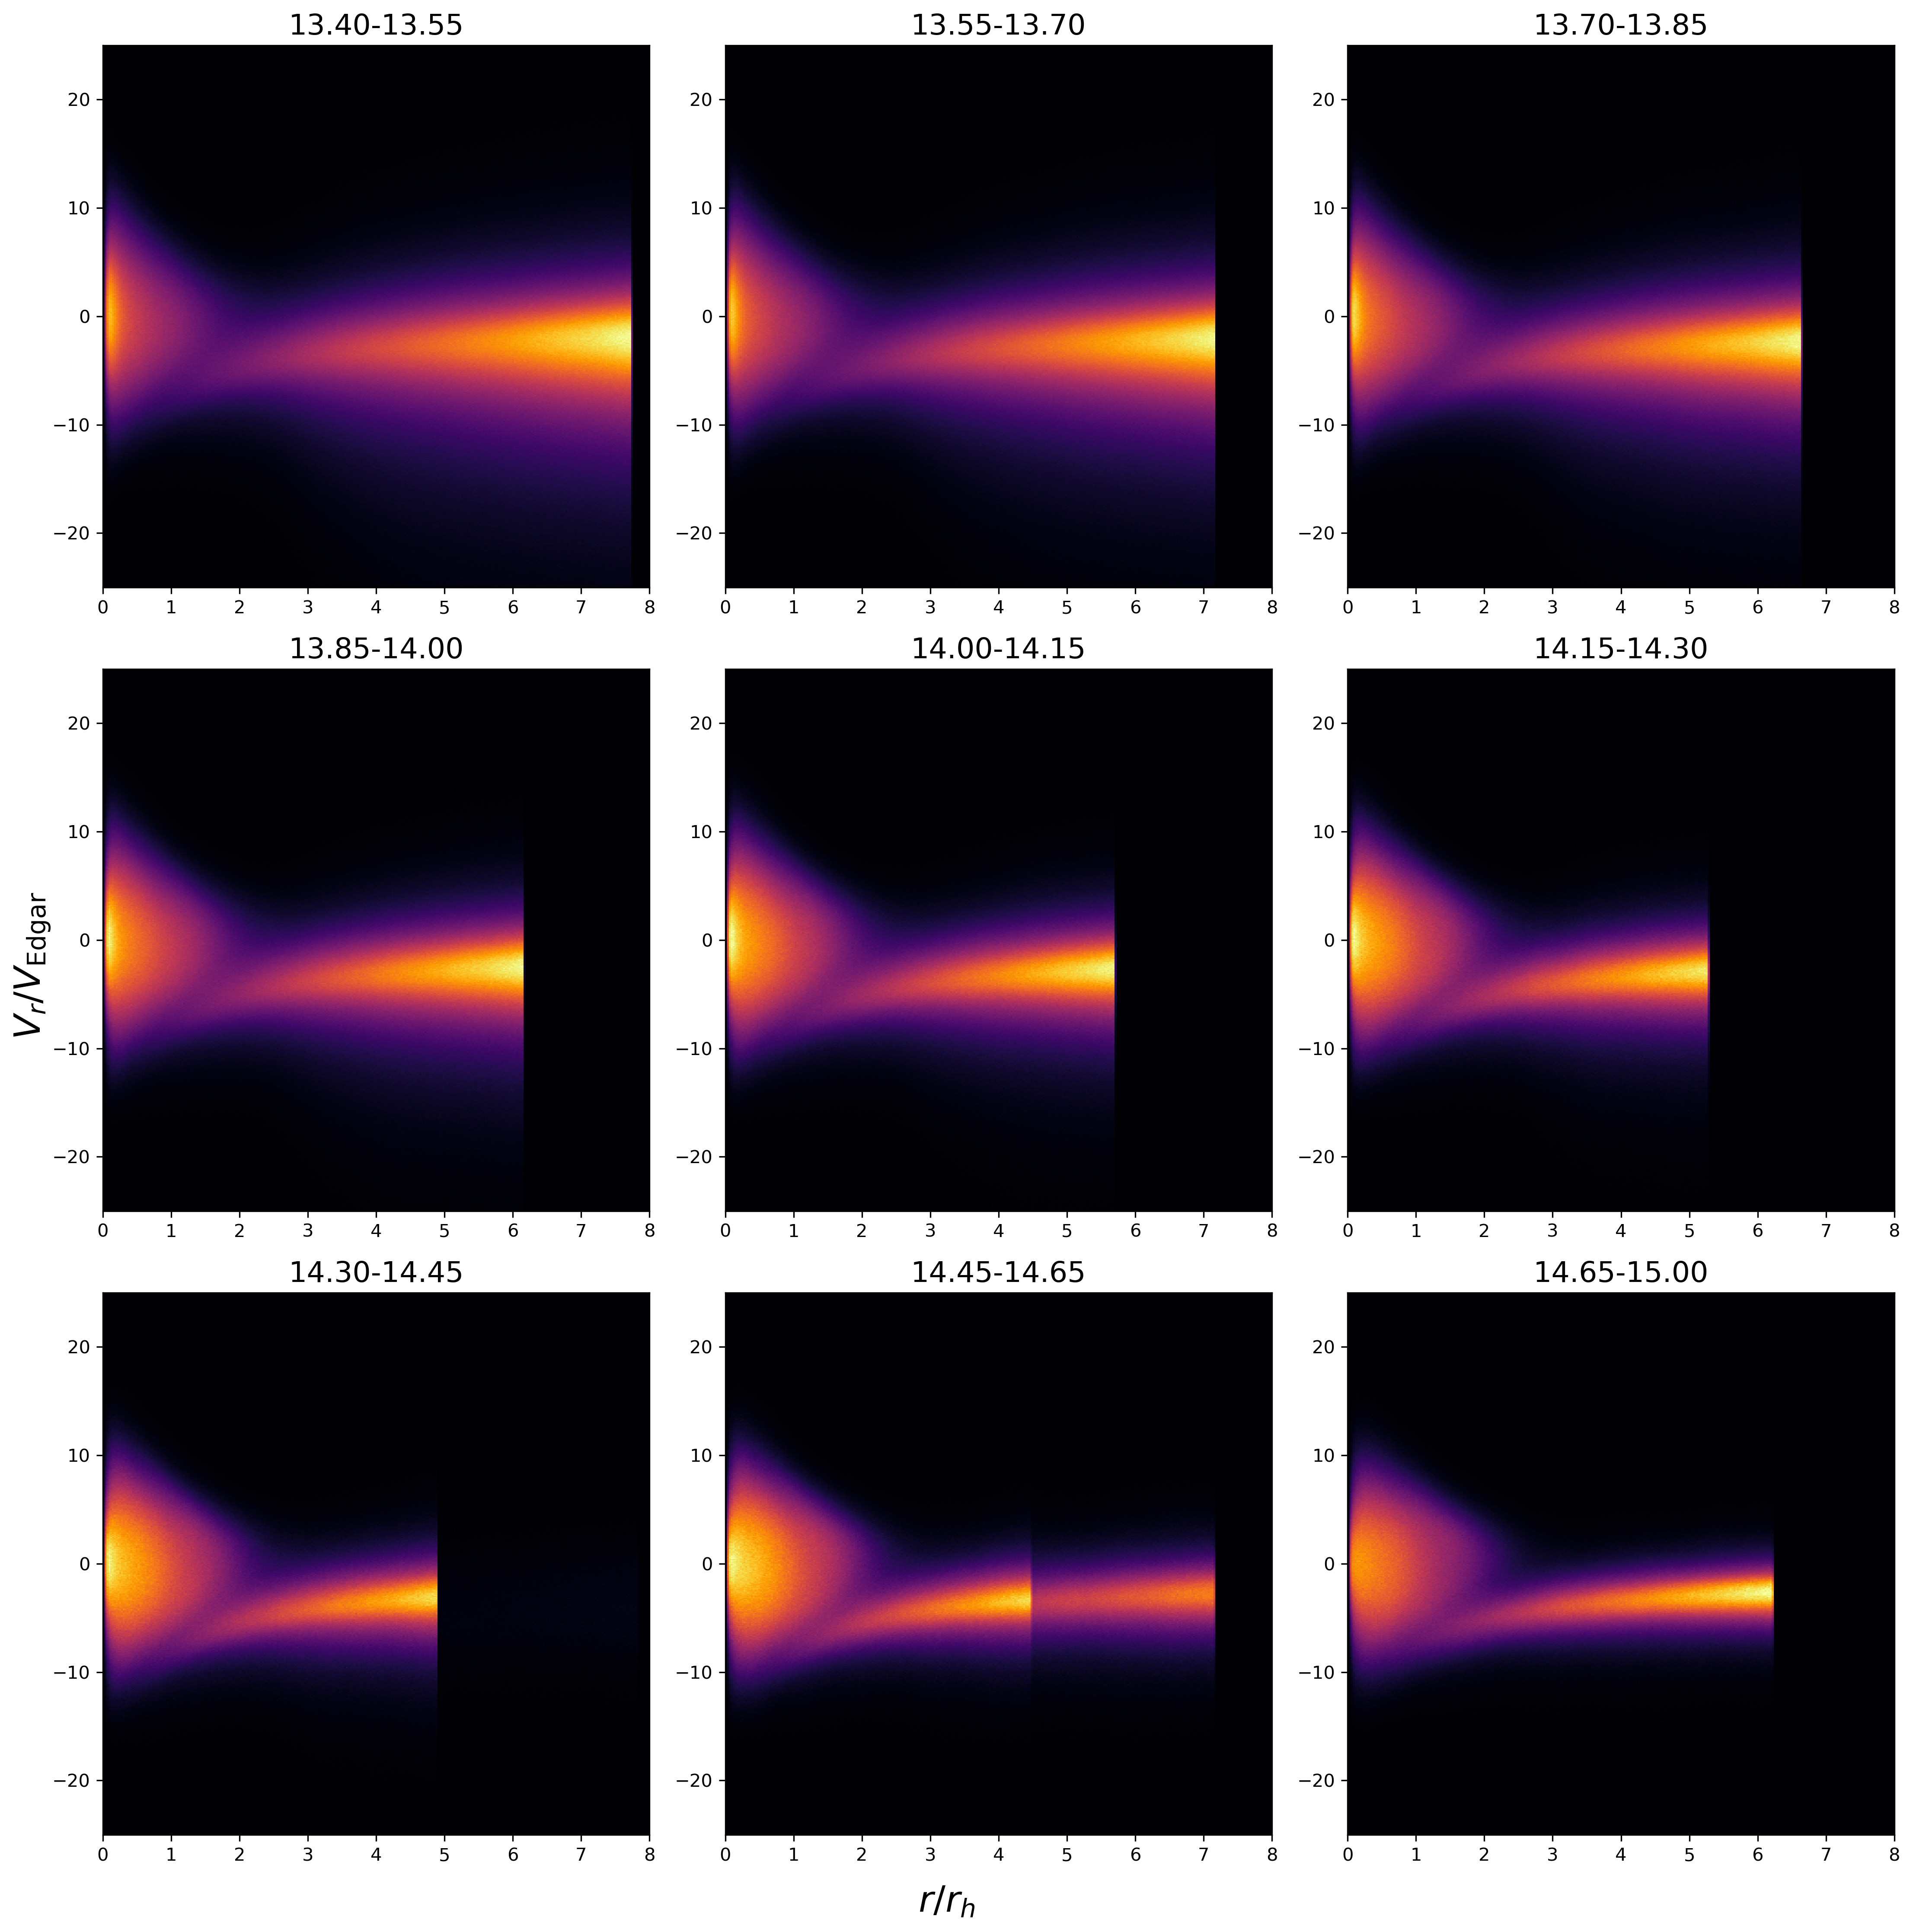

In [4]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(3, 3, figsize=(15, 15), dpi=300)
ax = ax.flatten()

with h5.File(join(SDD, 'data/mass_bin_particles.h5'), 'r') as bin_part:
    for ind, mbin in enumerate(MBINSTRS):
        mask = bin_part[mbin][:]

        Vr = VR[mask]
        r = R[mask]

        Morb = 10**np.array(mbin.split('-')).astype(float).mean()
        rh_edgar = (843.8 / 1000) * (Morb / PIVOT_MASS)**(0.221)

        v_edgar = np.sqrt(G * Morb / rh_edgar)

        ax[ind].hist2d(r/rh_edgar, Vr/v_edgar, bins=[np.linspace(0, 8, 00), np.linspace(-25, 25, 500)], cmap='inferno')
        ax[ind].set_title(mbin, fontsize=16)


fig.supxlabel(r'$r/r_h$', fontsize=20)
fig.supylabel(r'$V_r/V_{\rm Edgar}$', fontsize=20)
plt.tight_layout()
plt.show()